In [ ]:
# Data Analytics III
# 1. Implement simple Naive Bayes classification algorithm using Python/R on iris.csv dataset.
# 2. Compute confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
# on the given dataset. 

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [24]:
df = pd.read_csv("C:/Users/Manish/Downloads/Iris.csv")

In [25]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [27]:
x = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] #x = Features (inputs to the model)
y = df['Species'] #y = Label/output (what you want to predict)

In [28]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [29]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [36]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=29)
#x_train, y_train: 75% of the data used to train the model
# x_test, y_test: 25% of the data used to test the model
# test_size=0.25: 25% of data for testing
# random_state=29: Ensures the split is reproducible (same every time)

In [37]:
len(x_train) #it gives you the total count of data points in the train set

112

In [38]:
len(x_test) #it gives you the total count of data points in the test set

38

In [42]:
model = GaussianNB() #Initializes a Gaussian Naive Bayes model

In [44]:
model.fit(x_train, y_train)
#trains model using training datax_train Input feature,y_train Target values

GaussianNB()

In [45]:
y_pred = model.predict(x_test)
# This line uses trained logistic regression model to make predictions on test data (x_test).
#y_pred will contain predicted values (like 0 or 1 for classification tasks) for each input in x_test.

In [46]:
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

In [47]:
model.score(x_train, y_train) #This line evaluates the accuracy of trained model on training data

1.0

In [48]:
model.score(x,y) # This line evaluates accuracy of trained model on entire dataset

0.9933333333333333

In [49]:
accuracy = accuracy_score(y_test, y_pred)
#calculates accuracy of model by comparing actual values (y_test) with predicted values (y_pred)
#Accuracy= Number of Correct Predictions/Total Predictions
accuracy

0.9736842105263158

In [50]:
error_rate = 1 - accuracy
#calculates the error rate, which is the proportion of incorrect predictions made by the model.
error_rate

0.02631578947368418

In [62]:
precision= precision_score(y_test, y_pred, average='micro')
#Precision tells you what fraction of predicted positives were actually correct
#Precision= (TP)/(TP + FP)
precision

0.9736842105263158

In [63]:
recall=recall_score(y_test, y_pred, average='micro')
#This calculates the recall (also called sensitivity or true positive rate) of the model.
#Recall = (TP)/(TP+FN)
recall

0.9736842105263158

In [58]:
cm = confusion_matrix(y_test, y_pred)
#calculates confusion matrix using actual labels (y_test) & predicted labels (y_pred).
cm

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 16]])

In [59]:
model.predict_proba(x_test)

array([[4.89684168e-165, 4.67876347e-009, 9.99999995e-001],
       [2.45854996e-156, 1.25572139e-004, 9.99874428e-001],
       [1.11069448e-141, 9.16939386e-005, 9.99908306e-001],
       [1.16555299e-165, 2.22982430e-007, 9.99999777e-001],
       [1.00000000e+000, 6.68332235e-021, 1.57082498e-047],
       [3.11482861e-094, 9.99411581e-001, 5.88418936e-004],
       [2.24597244e-211, 3.98523956e-007, 9.99999601e-001],
       [3.14090121e-103, 9.67318534e-001, 3.26814665e-002],
       [2.01750103e-117, 9.98852977e-001, 1.14702348e-003],
       [5.34112152e-084, 9.99986844e-001, 1.31558624e-005],
       [1.58619805e-232, 7.28577255e-011, 1.00000000e+000],
       [1.00000000e+000, 4.73097509e-020, 1.22295620e-043],
       [8.05405443e-064, 1.00000000e+000, 9.82100898e-012],
       [7.13277031e-196, 1.84496698e-008, 9.99999982e-001],
       [1.37032547e-066, 9.99999981e-001, 1.88469993e-008],
       [1.48278582e-141, 1.97017287e-002, 9.80298271e-001],
       [6.15510293e-289, 3.35845556e-014

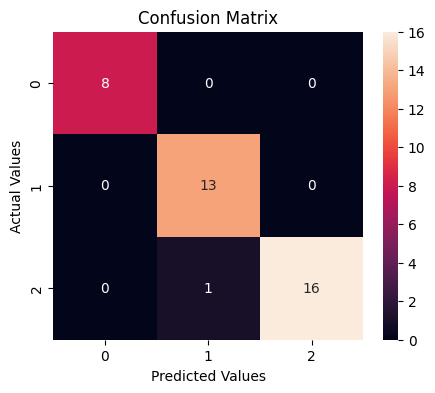

In [61]:
plt.figure(figsize=(5,4)) #sets the size of the plot.
sns.heatmap(cm, annot=True) #draws the heatmap with numbers shown (annot=True).
plt.title('Confusion Matrix') #sets the title of the plot.
plt.ylabel('Actual Values') #label the axes for clarity.
plt.xlabel('Predicted Values') #label the axes for clarity.
plt.show() # displays the plot.
